<a href="https://colab.research.google.com/github/therokitoki/AA2_TP_Alsop-Hachen-Nemeth/blob/main/ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

REPO_NAME = "AA2_TP_Alsop-Hachen-Nemeth"
if REPO_NAME not in os.getcwd():
  if not os.path.exists(REPO_NAME):
    !git clone https://github.com/therokitoki/{REPO_NAME}.git
  os.chdir(REPO_NAME)

Cloning into 'AA2_TP_Alsop-Hachen-Nemeth'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 53 (delta 20), reused 22 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 166.06 KiB | 1.17 MiB/s, done.
Resolving deltas: 100% (20/20), done.


# Problema 1

## Descripción:
En este problema, se presenta un conjunto de datos que contiene información sobre el rendimiento académico de estudiantes universitarios, así como diversos factores que podrían influir en él. El objetivo es construir un modelo de regresión utilizando redes neuronales para predecir el índice de rendimiento académico de los estudiantes basado en las características proporcionadas.

## Dataset:
El dataset proporcionado incluye las siguientes variables para cada estudiante:
Hours Studied: El número total de horas dedicadas al estudio por cada estudiante.
Previous Scores: Las puntuaciones obtenidas por los estudiantes en exámenes previos.
Extracurricular Activities: Si el estudiante participa en actividades extracurriculares (Sí o No).
Sleep Hours: El número promedio de horas de sueño que el estudiante tuvo por día.
Sample Question Papers Practiced: El número de cuestionarios de muestra que el estudiante practicó.
Además, el dataset incluye la variable objetivo:
Performance Index: Un índice que representa el rendimiento académico general de cada estudiante, redondeado al entero más cercano. Este índice varía de 10 a 100, donde valores más altos indican un mejor rendimiento.
## Objetivo:
Utilizando el dataset proporcionado, el objetivo es construir un modelo de regresión utilizando redes neuronales que pueda predecir con precisión el índice de rendimiento académico de los estudiantes. Se debe entrenar y evaluar el modelo utilizando técnicas adecuadas de validación y métricas de evaluación de regresión.


# Preparación del entorno

In [2]:
!pip install pandas
!pip install scikit-learn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [4]:
dataset_1 = '/content/AA2_TP_Alsop-Hachen-Nemeth/datasets/Student_Performance.csv'

In [5]:
student_df = pd.read_csv(dataset_1)
student_df.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [6]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


Observamos que las variables cuantitativas están correctamente configuradas como **numéricas**.

Codificación de variables

In [7]:
#student_df['Extracurricular Activities'] = student_df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

# División de datos

In [8]:
X = student_df.drop('Performance Index', axis=1)
y = student_df['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Cantidad de datos luego de la separación')
print(f'Train: {X_train.shape[0]} - 80%\n Test: {X_test.shape[0]} - 20%')

Cantidad de datos luego de la separación
Train: 8000 - 80%
 Test: 2000 - 20%


# EDA

- Hours Studied: El número total de horas dedicadas al estudio por cada estudiante.
- Previous Scores: Las puntuaciones obtenidas por los estudiantes en exámenes previos.
- Extracurricular Activities: Si el estudiante participa en actividades extracurriculares (Sí o No).
- Sleep Hours: El número promedio de horas de sueño que el estudiante tuvo por día.
- Sample Question Papers Practiced: El número de cuestionarios de muestra que el estudiante practicó.
- Performance Index: Un índice que representa el rendimiento académico general de cada estudiante, redondeado al entero más cercano. Este índice varía de 10 a 100, donde valores más altos indican un mejor rendimiento.

In [9]:
print('Variables cuantitativas: ')
print(X_train.describe())
print('\nVariables cualitativas: ')
print(X_train['Extracurricular Activities'].describe())

Variables cuantitativas: 
       Hours Studied  Previous Scores  Extracurricular Activities  \
count    8000.000000      8000.000000                 8000.000000   
mean        4.983250        69.531000                    0.494625   
std         2.594862        17.343735                    0.500002   
min         1.000000        40.000000                    0.000000   
25%         3.000000        54.750000                    0.000000   
50%         5.000000        70.000000                    0.000000   
75%         7.000000        85.000000                    1.000000   
max         9.000000        99.000000                    1.000000   

       Sleep Hours  Sample Question Papers Practiced  
count  8000.000000                       8000.000000  
mean      6.541625                          4.616500  
std       1.698493                          2.861241  
min       4.000000                          0.000000  
25%       5.000000                          2.000000  
50%       7.000000    

### Valores NaN

In [10]:
na_values = X_train.isnull().sum()
print(f'Valores Nan:\n{na_values}')
if na_values.sum() == 0:
    print('\nNo se encontraron valores Nan')

print('\nFilas duplicadas:',X_train.duplicated().sum())

Valores Nan:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
dtype: int64

No se encontraron valores Nan

Filas duplicadas: 503


### Matriz de correlación

ROKI DUDA: Deberíamos ver la relación con la variable target?

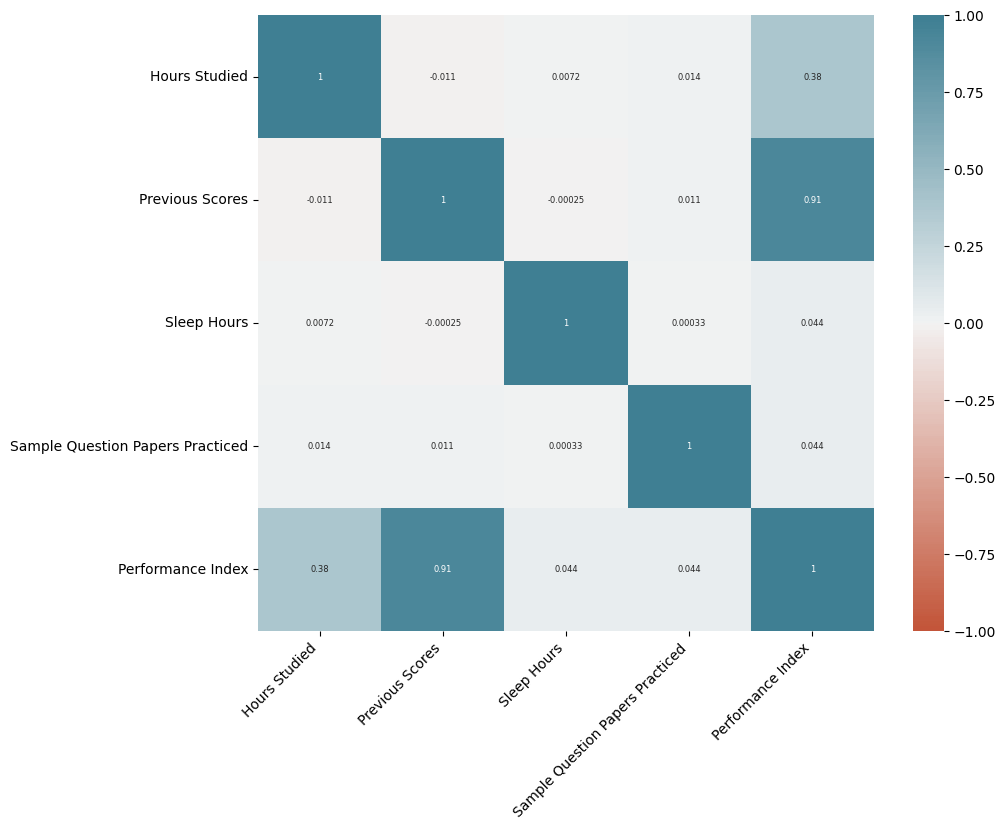

In [30]:
df_columns = pd.concat([X_train, y_train], axis=1)

df_columns_corr =pd.DataFrame(df_columns,columns=df_columns.drop(columns=['Extracurricular Activities']).columns)

plt.figure(figsize=(10,8))
corr = df_columns_corr.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

Hours Studied
count    8000.000000
mean        4.983250
std         2.594862
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max         9.000000
Name: Hours Studied, dtype: float64 



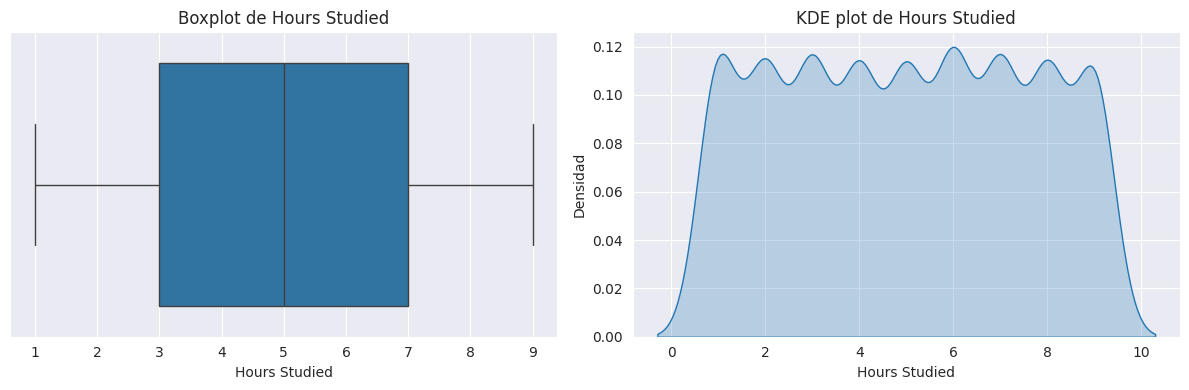

#############################################################################################
Previous Scores
count    8000.000000
mean       69.531000
std        17.343735
min        40.000000
25%        54.750000
50%        70.000000
75%        85.000000
max        99.000000
Name: Previous Scores, dtype: float64 



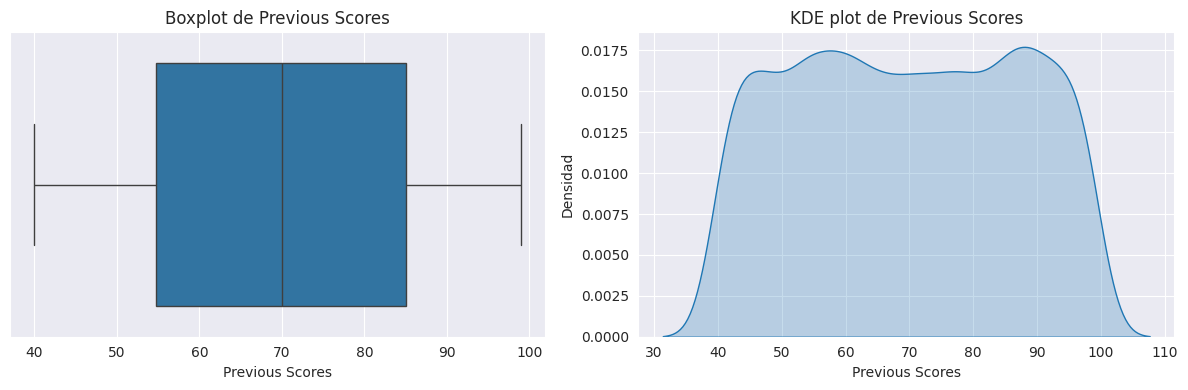

#############################################################################################
Extracurricular Activities
count    8000.000000
mean        0.494625
std         0.500002
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Extracurricular Activities, dtype: float64 



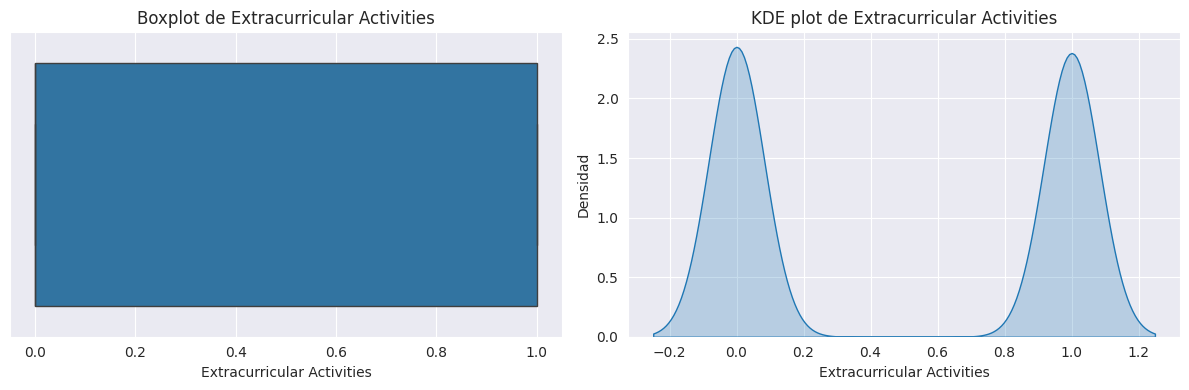

#############################################################################################
Sleep Hours
count    8000.000000
mean        6.541625
std         1.698493
min         4.000000
25%         5.000000
50%         7.000000
75%         8.000000
max         9.000000
Name: Sleep Hours, dtype: float64 



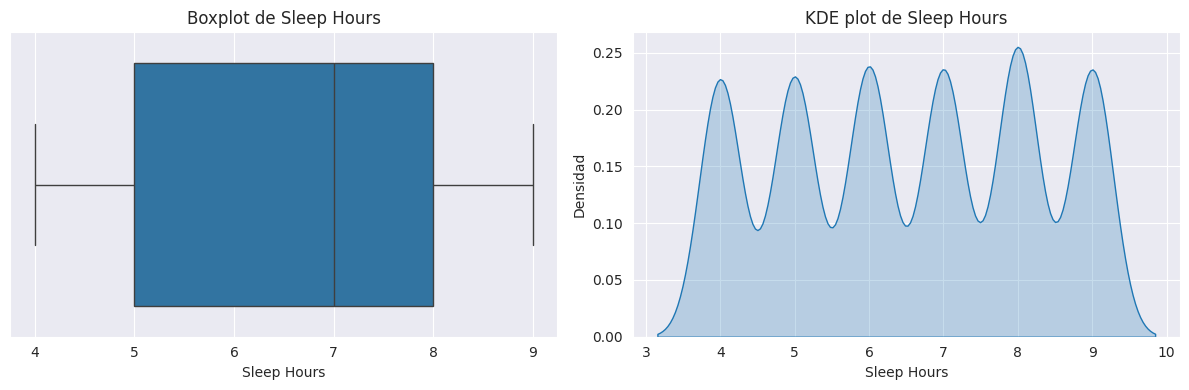

#############################################################################################
Sample Question Papers Practiced
count    8000.000000
mean        4.616500
std         2.861241
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max         9.000000
Name: Sample Question Papers Practiced, dtype: float64 



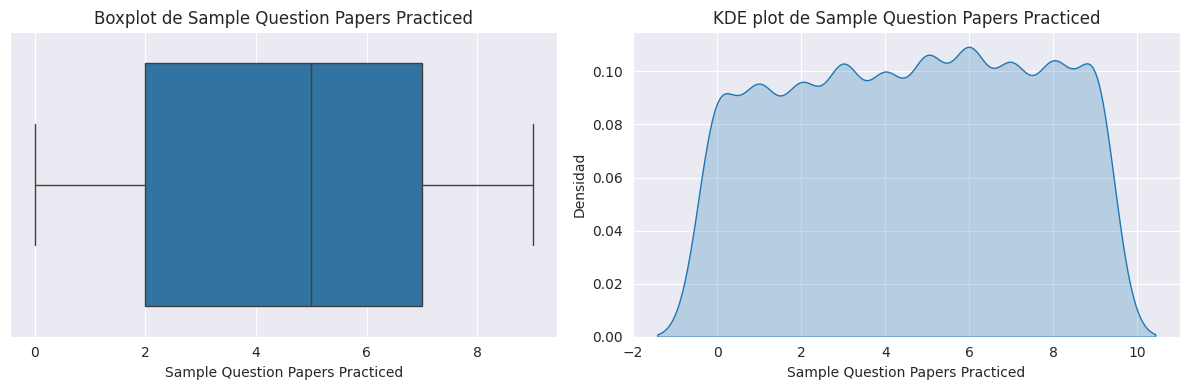

#############################################################################################
Performance Index
count    8000.000000
mean       55.311500
std        19.202059
min        10.000000
25%        40.000000
50%        55.000000
75%        71.000000
max       100.000000
Name: Performance Index, dtype: float64 



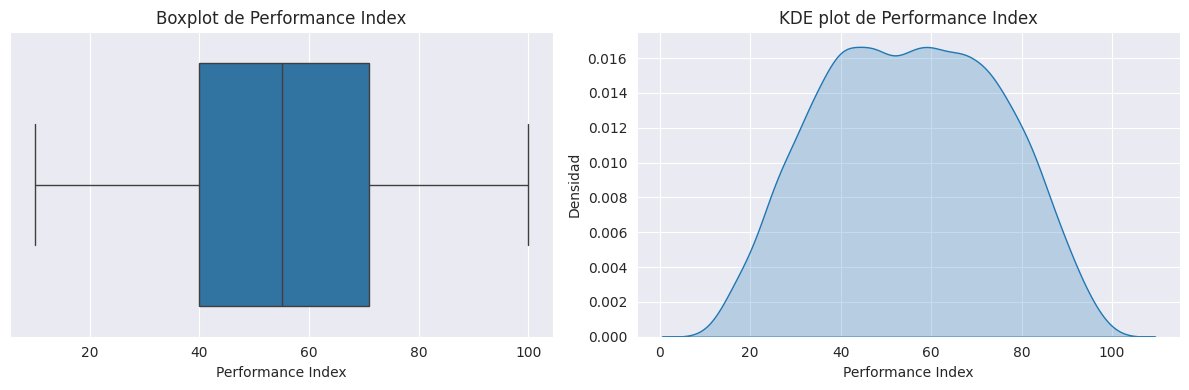

#############################################################################################


In [43]:
x_train_grafico=pd.DataFrame(df_columns,columns=df_columns.columns)

for columna in x_train_grafico:
    print(columna)
    print(df_columns[columna].describe(), '\n')

    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    sns.boxplot(data=df_columns, x=columna, ax=axs[0])
    axs[0].set_title(f'Boxplot de {columna}')

    sns.kdeplot(data=df_columns, x=columna, fill=True, ax=axs[1])
    axs[1].set_title(f'KDE plot de {columna}')
    axs[1].set_ylabel('Densidad')

    plt.tight_layout()
    plt.show()

    print('#############################################################################################')



# Definición del modelo

In [66]:
histories = []

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)
])

model.summary()

model.compile(optimizer='adam', loss='MeanSquaredError', metrics=['R2Score','RootMeanSquaredError'])

history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)
histories.append(history)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - R2Score: -4.2945 - RootMeanSquaredError: 42.9514 - loss: 2006.8798 - val_R2Score: 0.7327 - val_RootMeanSquaredError: 9.9401 - val_loss: 98.8047
Epoch 2/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - R2Score: 0.7653 - RootMeanSquaredError: 9.3433 - loss: 87.4544 - val_R2Score: 0.8246 - val_RootMeanSquaredError: 8.0516 - val_loss: 64.8279
Epoch 3/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - R2Score: 0.8363 - RootMeanSquaredError: 7.8378 - loss: 61.4491 - val_R2Score: 0.8596 - val_RootMeanSquaredError: 7.2045 - val_loss: 51.9050
Epoch 4/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - R2Score: 0.8648 - RootMeanSquaredError: 7.0296 - loss: 49.4380 - val_R2Score: 0.8861 - val_RootMeanSquaredError: 6.4876 - val_loss: 42.0896
Epoch 5/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - R2Score: 0.8903 - RootMeanSquaredError: 6.3123 - loss: 39.8560 - val_R2Score: 0.9059 - val_RootMeanSquaredError: 5.8975 - val_loss: 34.7807
Epoch 6/25
200/200 ━━━━━━━

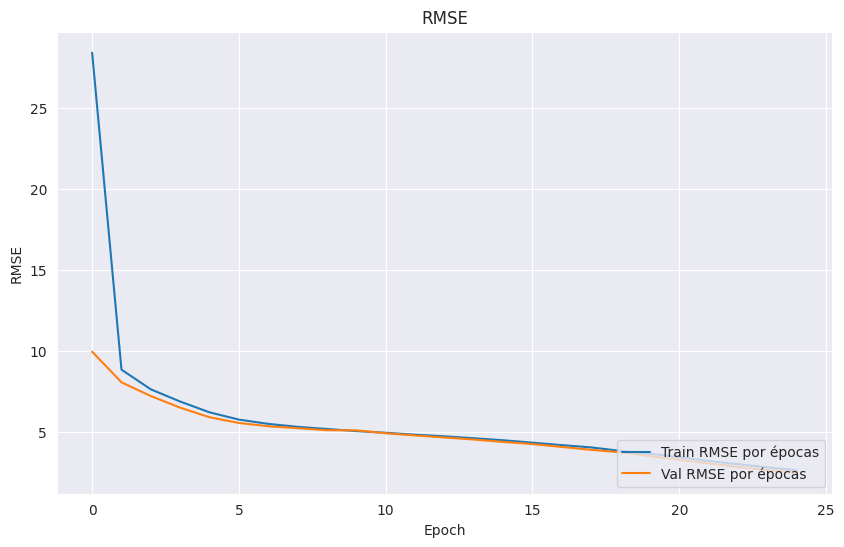

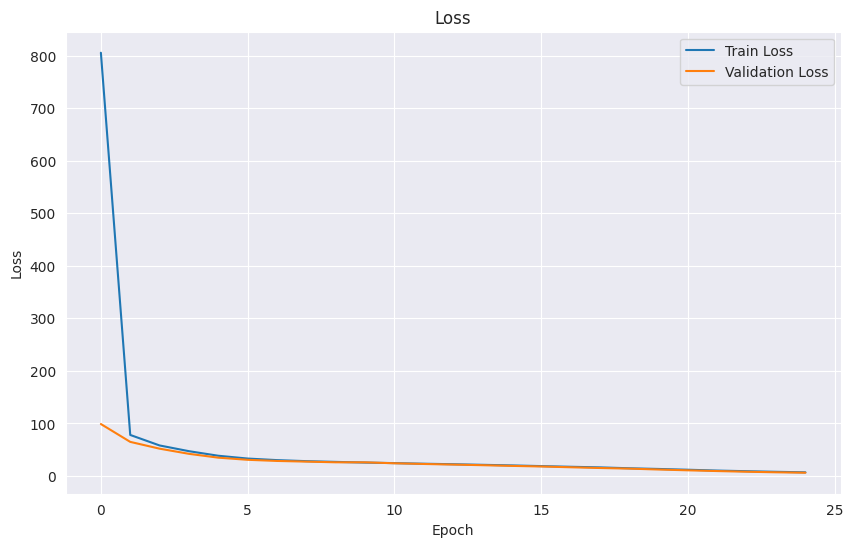

In [67]:
# RMSE
plt.figure(figsize=(10, 6))

for history in histories:
    plt.plot(history.history['RootMeanSquaredError'], label=f'Train RMSE por épocas')
    plt.plot(history.history['val_RootMeanSquaredError'], label=f'Val RMSE por épocas')

plt.title('RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend(loc='lower right')
plt.show()

# Loss
plt.figure(figsize=(10, 6))

for history in histories:
    plt.plot(history.history['loss'], label=f'Train Loss')
    plt.plot(history.history['val_loss'], label=f'Validation Loss')

plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


## Resultados

In [68]:
results = model.evaluate(X_test, y_test, verbose=1)
print(f"Test R2: {results[1]}")
print(f"Test RMSE: {results[2]}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - R2Score: 0.9825 - RootMeanSquaredError: 2.5890 - loss: 6.7055
Test R2: 0.982578456401825
Test RMSE: 2.5408976078033447


In [72]:
y_pred = model.predict(X_test)
comparison_df = pd.DataFrame({
    'Real': np.array(y_test),
    'Predicción': y_pred.flatten().astype('int')
})
print(comparison_df)
print(comparison_df.mean())

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
      Real  Predicción
0     51.0          54
1     20.0          23
2     46.0          47
3     28.0          31
4     41.0          45
...    ...         ...
1995  45.0          47
1996  66.0          61
1997  16.0          18
1998  65.0          63
1999  47.0          46

[2000 rows x 2 columns]
Real          54.8780
Predicción    54.4535
dtype: float64


# Problema 2

### Descripción:
El objetivo de este ejercicio es implementar un sistema de clasificación de gestos de "piedra", "papel" o "tijeras" utilizando MediaPipe para la detección de las manos y una red neuronal densa para realizar la clasificación. El ejercicio se dividirá en tres partes, cada una implementada en un script de Python.

Doc de MediaPipe para detección de landmarks:

https://ai.google.dev/edge/mediapipe/solutions/vision/hand_landmarker

### Objetivo:
Grabación del dataset de gestos: En esta primera parte, se implementará un script llamado record-dataset.py, que permitirá grabar un dataset de gestos utilizando la cámara web y MediaPipe para detectar los landmarks (puntos clave) de la mano. Cada gesto se etiquetará como "piedra" (0), "papel" (1) o "tijeras" (2) y se almacenará junto con sus coordenadas en archivos .npy.
Entrenamiento del clasificador de gestos: En esta segunda parte, se implementará un script llamado train-gesture-classifier.py, donde se entrenará una red neuronal densa utilizando los datos de los landmarks obtenidos en la primera parte. El modelo resultante será capaz de clasificar los gestos basándose en las posiciones de los puntos clave de la mano.
Prueba del sistema completo: En la tercera parte, se implementará un script llamado rock-paper-scissors.py, que tomará como entrada la imagen de la cámara web, utilizará MediaPipe para detectar los landmarks de la mano, y clasificará el gesto en "piedra", "papel" o "tijeras" utilizando el modelo entrenado.
